![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [20]:
#Load and inspect the Netflix data
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_df=pd.read_csv("netflix_data.csv")
print(netflix_df.head())
#print(netflix_df.iloc[0:5,0:4]) 
#unique_types = netflix_df['type'].unique()
#print(unique_types)

  show_id  ...             genre
0      s1  ...  International TV
1      s2  ...            Dramas
2      s3  ...     Horror Movies
3      s4  ...            Action
4      s5  ...            Dramas

[5 rows x 11 columns]


In [21]:
#Subset the DataFrame for "Movies"
netflix_subset =netflix_df[netflix_df['type'] == "Movie"]
print(netflix_subset.iloc[0:5,0:4])

  show_id   type  title           director
1      s2  Movie   7:19  Jorge Michel Grau
2      s3  Movie  23:59       Gilbert Chan
3      s4  Movie      9        Shane Acker
4      s5  Movie     21     Robert Luketic
6      s7  Movie    122    Yasir Al Yasiri


In [22]:
#Subset the columns of the new DataFrame
netflix_movies = netflix_subset[["title","country","genre","release_year","duration"]]
netflix_movies

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95
...,...,...,...,...,...
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44


In [23]:
#Filter the DataFrame by Movie duration
short_movies = netflix_movies[netflix_movies['duration'] < 60]
short_movies

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
...,...,...,...,...,...
7679,WWII: Report from the Aleutians,United States,Documentaries,1943,45
7692,Ya no estoy aquí: Una conversación entre Guill...,NaN,Documentaries,2020,15
7718,Yoo Byung Jae: Discomfort Zone,South Korea,Stand-Up,2018,54
7771,Zion,United States,Documentaries,2018,12


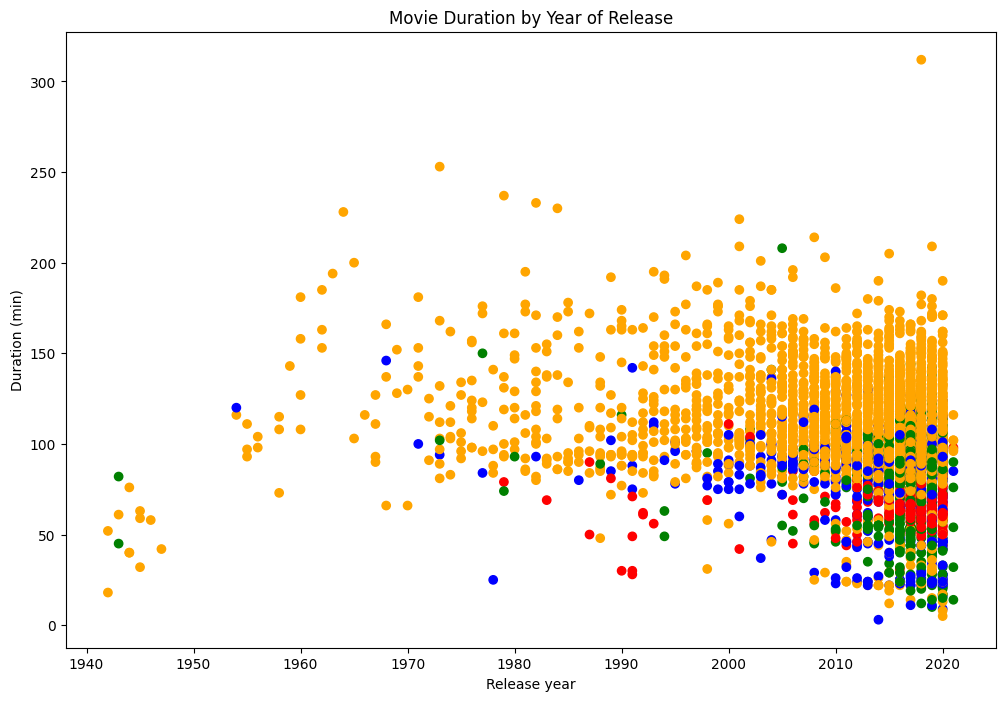

In [24]:
#Assign colors to movie genres
#unique_genre = short_movies["genre"].unique()
#unique_genre
colors = []
for genre in netflix_movies['genre']:
    if 'Children' in genre:
        colors.append('blue')
    elif 'Documentaries' in genre:
        colors.append('green')
    elif 'Stand-Up' in genre:
        colors.append('red')
    else:
        colors.append('orange')
        
fig=plt.figure(figsize = (12,8))
plt.scatter(x='release_year', y='duration', data = netflix_movies, c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

In [25]:
#Are we certain that movies are getting shorter?

answer = "maybe"

#While genres like children's movies and documentaries are all clustered around the botom half of the plot,there is no clearr indication of a change in duration. There is need to perform additional analyses to be certain.